In [26]:
import sissopp
from sissopp.py_interface import get_fs_solver
import json
import os
from sympy import symbols, simplify, sin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = np.linspace(-1, 1, 500)
y = np.cos(x)

# Save to CSV in a format SISSO++ expects
df = pd.DataFrame({"sample_id": [f"s{i+1}" for i in range(len(x))], 'f1': x, 'target': y})
df.to_csv("/home/paolo/Thesis/Test_SISSO/data/cosine_data.csv", index=False)

In [22]:
data_file = "/home/paolo/Thesis/Test_SISSO/data/cosine_data.csv"

os.environ["SISSOPP_TUT_DAT_FILE"] = data_file

In [ ]:
# Try the fit with the exact functional form
cos_json = {
    'data_file': data_file,
     'property_key': 'target',
     'desc_dim': 1,
     'n_sis_select': 10,
     'max_rung': 2,
     'calc_type': 'regression',
     'min_abs_feat_val': 1e-05,
     'max_abs_feat_val': 1e8,
     'n_residual': 10,
     'n_models_store': 1,
     'leave_out_frac': 0.0,
     'leave_out_inds': [],
     'opset': ['add', 'sub', 'mult', 'div', 'cos', 'sin', 'sqrt', 'sq']
}
json.dump(cos_json, open("/home/paolo/Thesis/Test_SISSO/data/cos.json", "w"), indent=4)

In [24]:
# Try the fit without the cosine but with the sine fucntion
cos_sin_json = {
    'data_file': data_file,
     'property_key': 'target',
     'desc_dim': 1,
     'n_sis_select': 10,
     'max_rung': 3,
     'calc_type': 'regression',
     'min_abs_feat_val': 1e-05,
     'max_abs_feat_val': 1e8,
     'n_residual': 10,
     'n_models_store': 1,
     'leave_out_frac': 0.0,
     'leave_out_inds': [],
     'opset': ['add', 'sub', 'mult', 'div', 'sin']
}
json.dump(cos_sin_json, open("/home/paolo/Thesis/Test_SISSO/data/cos_sin.json", "w"), indent=4)

In [27]:
f1 = symbols('x')
c0 = 9.999335689277928e-01
a0 = -2.497423989462255e-01
# Build the expression
expr = c0 + a0 * (sin(f1) + f1)*f1

# Optionally simplify (optional)
simplify(expr)

-0.249742398946225*x*(x + sin(x)) + 0.999933568927793

Roughly coincides with the Taylor expansion of cosine up to second order.

In [41]:
# Try the fit without the cosine but with only +,-,*,/
cos_taylor_json = {
    'data_file': data_file,
     'property_key': 'target',
     'desc_dim': 1,
     'n_sis_select': 20,
     'max_rung': 5,
     'calc_type': 'regression',
     'min_abs_feat_val': 1e-02,
     'max_abs_feat_val': 1e5,
     'n_residual': 10,
     'n_models_store': 1,
     'leave_out_frac': 0.0,
     'leave_out_inds': [],
     'opset': ['add', 'sub', 'mult', "sq"]
}
json.dump(cos_taylor_json, open("/home/paolo/Thesis/Test_SISSO/data/cos_taylor.json", "w"), indent=4)

In [ ]:
# # Try the fit without the cosine but with only +,-,*,/
# cos_taylor_json = {
#     'data_file': data_file,
#      'property_key': 'target',
#      'desc_dim': 1,
#      'n_sis_select': 20,
#      'max_rung': 4,
#      'calc_type': 'regression',
#      'min_abs_feat_val': 1e-03,
#      'max_abs_feat_val': 1e5,
#      'n_residual': 10,
#      'n_models_store': 1,
#      'leave_out_frac': 0.0,
#      'leave_out_inds': [],
#      'opset': ['add', 'sub', 'mult', "sq"]
# }
# json.dump(cos_taylor_json, open("/home/paolo/Thesis/Test_SISSO/data/cos_taylor.json", "w"), indent=4)

In [18]:
f1 = symbols('x')
c0 = 9.965315976421334e-01
a0 = -4.651279827944478e-01
# Build the expression
expr = c0 + a0 * (f1**2)

# Optionally simplify (optional)
simplify(expr)

0.996531597642133 - 0.465127982794448*x**2

In [39]:
x = np.linspace(-2*np.pi, 2*np.pi, 500)
pysr_target = - 0.000759117171754911 * x**6 + 0.0388271704796444 * x**4 - 0.496481051788833 * x**2 + 0.999288569767875
sissopp_target = 9.965315976421334e-01 + -4.651279827944478e-01 * (x**2)
sissopp_rung5 = 0.0571277941592434 * x**4 - 0.5141501474331906 * x**2 + 1.001420544468147

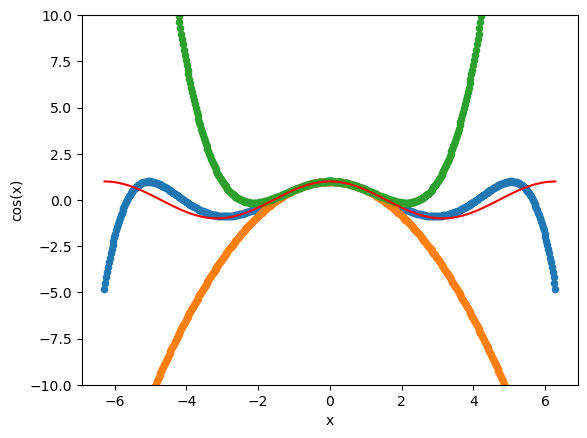

In [40]:
plt.scatter(x, pysr_target, s = 20, label = 'PySR result with niter = 100')
plt.scatter(x, sissopp_target, s = 20, label = 'SISSO++ result with max_rung=4')
plt.scatter(x, sissopp_rung5, s = 20, label = 'SISSO++ result with max_rung=5')
plt.plot(x, np.cos(x), color='r', label = 'Ideal function')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.ylim([-10, 10])
plt.show()